In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

In [7]:
#reading data from pandas
dataset = pd.read_csv("Energy Meter.csv", names=['Voltage', 'Current', 'Power', 'Class'])

In [8]:
print(dataset.shape)

(400, 4)


In [9]:
dataset.head()

,Voltage,Current,Power,Class
0,0.0,0.0,0.0,NoLoad
1,0.0,0.0,0.0,NoLoad
2,0.0,0.0,0.0,NoLoad
3,0.0,0.0,0.0,NoLoad
4,0.0,0.0,0.0,NoLoad


In [10]:
dataset.describe()

,Voltage,Current,Power
count,400.000000,400.000000,400.000000
mean,160.657320,0.317734,68.065053
std,93.125536,0.320430,68.941682
min,0.000000,0.000000,0.000000
25%,79.151450,0.076849,0.000000
50%,213.114800,0.176985,38.430426
75%,215.031300,0.398765,101.438042
max,304.340200,1.227349,264.859337


In [12]:
dataset.groupby('Class').size()

Class
Medium    100
NoLoad    100
Normal    100
Risk      100
dtype: int64

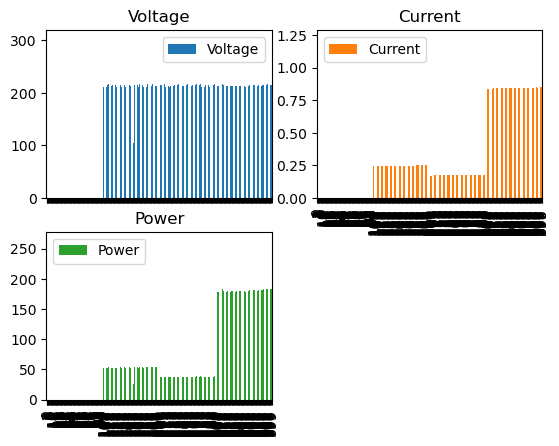

In [15]:
dataset.plot(kind='bar', subplots=True, layout=(2,2))
plt.title("Bar Plot")
plt.show()

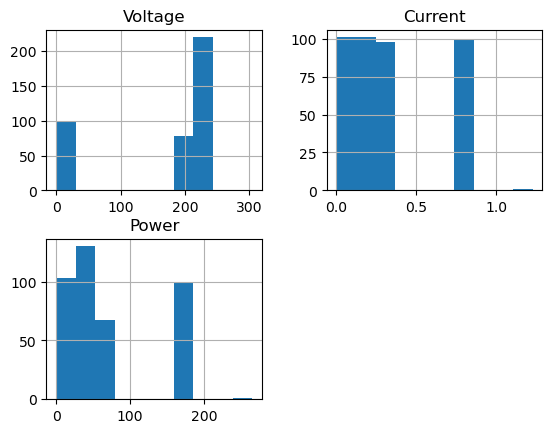

In [14]:
dataset.hist()
plt.title('Histogram Plot')
plt.show()

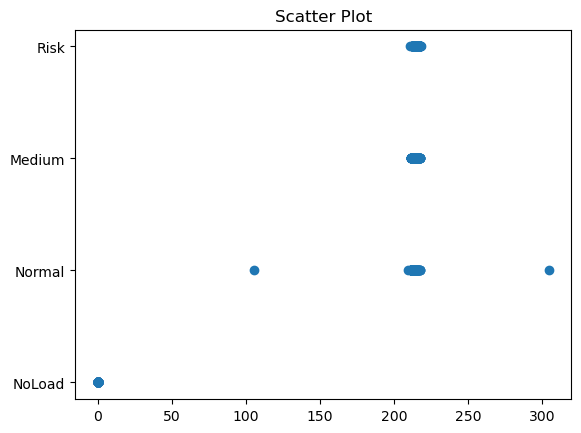

In [20]:
plt.scatter(data=dataset, y='Class', x='Voltage')
plt.title("Scatter Plot")
plt.show()

In [23]:
array = dataset.values
X = array[:, 0:3]
Y = array[:, 3]

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=1, shuffle=True)

In [27]:
models = []
models.append(("LR", LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(("LDA", LinearDiscriminantAnalysis()))
models.append(("KNN", KNeighborsClassifier()))
models.append(("CART", DecisionTreeClassifier()))
models.append(("NB", GaussianNB()))
models.append(("SVM", SVC(gamma='auto')))

LR: 0.996875 (0.009375)
LDA: 0.996875 (0.009375)
KNN: 0.993750 (0.018750)
CART: 0.996875 (0.009375)
NB: 0.990625 (0.020010)


C:\Users\HP.DESKTOP-5IHNLMQ\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\HP.DESKTOP-5IHNLMQ\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer

SVM: 0.990625 (0.020010)


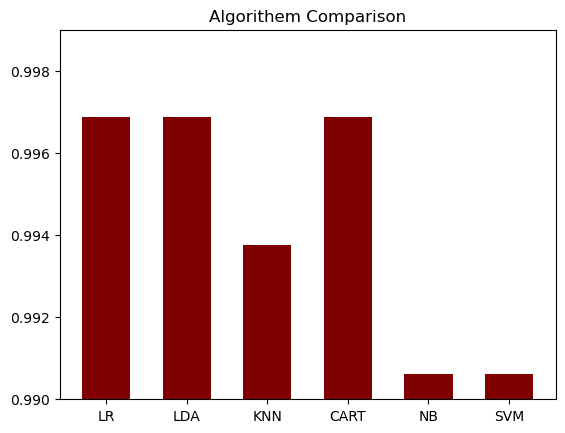

In [28]:
results = []
names = []
res = []

for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=None)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    res.append(cv_results.mean())
    print("%s: %f (%f)" % (name, cv_results.mean(), cv_results.std()))
    
    
plt.ylim(.990, .999)
plt.bar(names, res, color='maroon', width=0.6)
plt.title("Algorithem Comparison")
plt.show()